In [1]:
import tensorflow as tf
import IPython
from scipy.io import wavfile
from scipy.io.wavfile import write

import matplotlib.pyplot as plt
import numpy as np

In [2]:
!wget -q https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/speech.wav

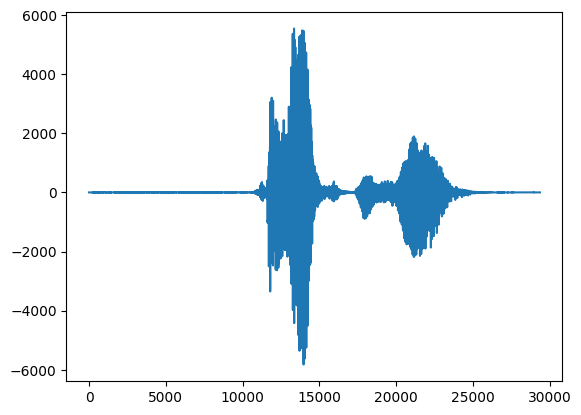

In [3]:
rate, waveform = wavfile.read('speech.wav')
plt.plot(waveform)
IPython.display.Audio(waveform, rate=rate)

In [4]:
# Convert the waveform to float32
waveform = waveform.astype('float32') / 32767.0

# Convert the waveform to a spectrogram via a STFT.
spectrogram = tf.signal.stft(
    waveform, frame_length=255, frame_step=128)
# Obtain the magnitude of the STFT.
spectrogram = tf.abs(spectrogram)

In [12]:
# number of frames:
#     num_frames = (waveform_length - frame_length) // frame_step + 1

spectrogram.shape

TensorShape([228, 129])

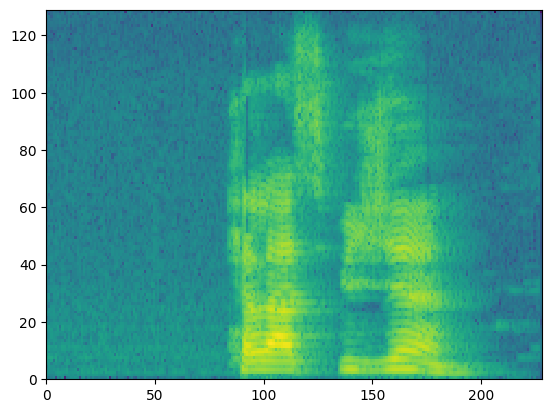

In [13]:
# Convert the frequencies to log scale and transpose, so that the time is
# represented on the x-axis (columns).
log_spec = np.log(spectrogram.numpy().T)
plt.pcolormesh(log_spec)

## Now create some reusable functions:

In [14]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  return spectrogram

def plot_spectrogram(spectrogram, ax):
  assert len(spectrogram.shape) == 2
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

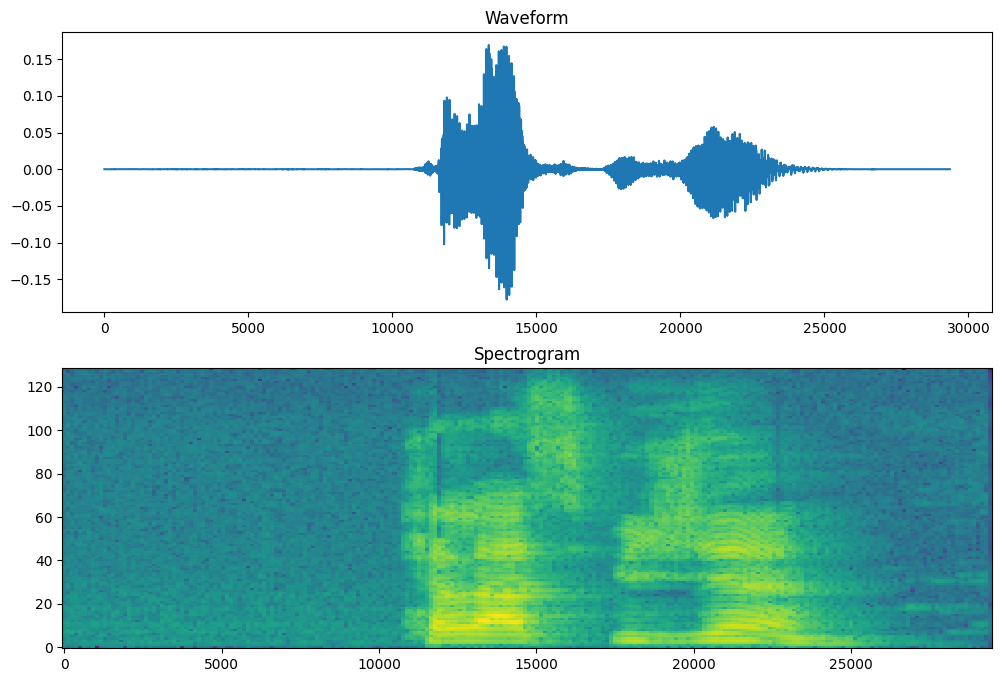

In [20]:
rate, waveform = wavfile.read('speech.wav')
waveform = waveform.astype('float32') / 32767.0
spectrogram = get_spectrogram(waveform)

fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform)
axes[0].set_title('Waveform')

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

Tutorial by [Class.vision](Class.Vision)